In [14]:
import pandas as pd
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

In [15]:
#checking whether the dataset is loaded correctly
print(customers.head())
print(transactions.head())
print(products.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  ProductID              ProductName     Category   Price
0      P001

In [16]:
#checking if there are any null or missing values
missing_customers_data = customers.isnull().sum()
missing_transactions_data = transactions.isnull().sum()
missing_products_data = products.isnull().sum()

#total missing data
missing_data = pd.DataFrame({ 
    'customers' : missing_customers_data, 
    'transaction' : missing_transactions_data, 
    'products' : missing_products_data
})
print(missing_data)

                 customers  transaction  products
Category               NaN          NaN       0.0
CustomerID             0.0          0.0       NaN
CustomerName           0.0          NaN       NaN
Price                  NaN          0.0       0.0
ProductID              NaN          0.0       0.0
ProductName            NaN          NaN       0.0
Quantity               NaN          0.0       NaN
Region                 0.0          NaN       NaN
SignupDate             0.0          NaN       NaN
TotalValue             NaN          0.0       NaN
TransactionDate        NaN          0.0       NaN
TransactionID          NaN          0.0       NaN


In [20]:
#identifying the missing values in every row of every dataset
print(customers[customers.isnull().any(axis=1)])  
print(transactions[transactions.isnull().any(axis=1)]) 
print(products[products.isnull().any(axis=1)]) 

Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


In [22]:
# Handling missing values based on the columns

# For customers dataset
customers['CustomerName'].fillna('Unknown')
customers['Region'].fillna('Unknown')
customers['SignupDate'].fillna('Unknown')

# For transactions dataset
transactions['Quantity'].fillna(0)
transactions['TotalValue'].fillna(0)
transactions['Price'].fillna(transactions['Price'].mean())  # For numerical columns
transactions['TransactionID'].fillna('Unknown')

# For products dataset
products['Category'].fillna('Unknown')
products['ProductName'].fillna('Unknown')
products['Price'].fillna(products['Price'].mean())

# Checking again after filling
print(customers.isnull().sum())
print(transactions.isnull().sum())
print(products.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [23]:
#display
print(customers.head())
print(transactions.head())
print(products.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  ProductID              ProductName     Category   Price
0      P001

In [24]:
#summary statistics 
print(customers.describe(include='all'))
print(transactions.describe())
print(products.describe(include='all'))

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4      

In [25]:
#to stop working with multiple datasets manually combining the datasets
combined = transactions.merge(products, on='ProductID', how='left').merge(customers, on='CustomerID', how='left')

#left join 1 - all rows from transactions will be kept and matching rows from products will be added according to ProductID
#left join 2 - all rows from the transactions and products will be retained, and matching rows from customers will be added according to customerID

print(combined.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

In [27]:
#to understand key metrics displaying the frist rows in combined dataset
print(combined.describe(include='all'))

       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean             NaN        NaN       NaN                  NaN     2.537000   
std              NaN        NaN       NaN                  NaN     1.117981   
min              NaN        NaN       NaN                  NaN     1.000000   
25%              NaN        NaN       NaN                  NaN     2.000000   
50%              NaN        NaN       NaN                  NaN     3.000000   
75%              NaN        NaN       NaN                  NaN     4.000000   
max              NaN        NaN       NaN                  NaN     4.000000   

         TotalValue     Price_x            ProductN

In [28]:
#identify most profitable categories
category_sales = combined.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_sales)

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


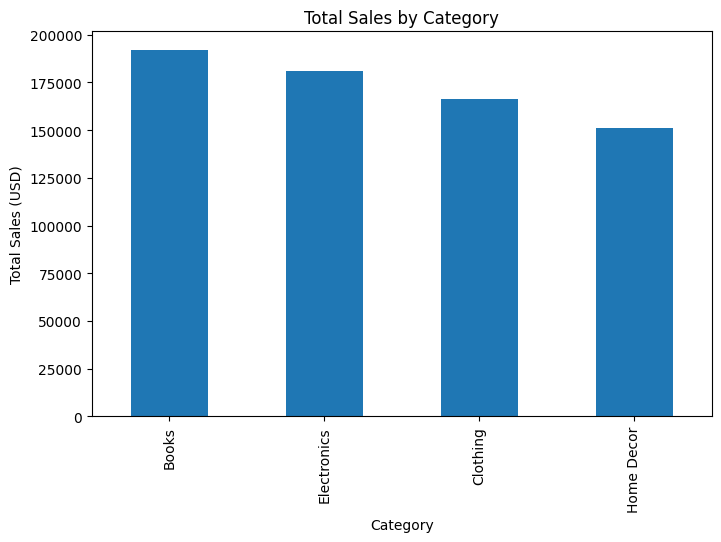

In [29]:
#visualizing profitable categories using a bar chart
import matplotlib.pyplot as plt
category_sales.plot(kind='bar', figsize=(8, 5), title="Total Sales by Category")
plt.ylabel("Total Sales (USD)")
plt.show()

In [30]:
#top 5 best selling products
top_products = combined.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_products)

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [31]:
#determine which regions are driving the most revenue
region_sales = combined.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [32]:
#to identify the size of customer base in each region - no of customers
region_customers = combined['Region'].value_counts()
print(region_customers)

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


In [33]:
# Convert TransactionDate to datetime
combined['TransactionDate'] = pd.to_datetime(combined['TransactionDate'])

#sales by month
sales_trend = combined.groupby(combined['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(sales_trend)

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


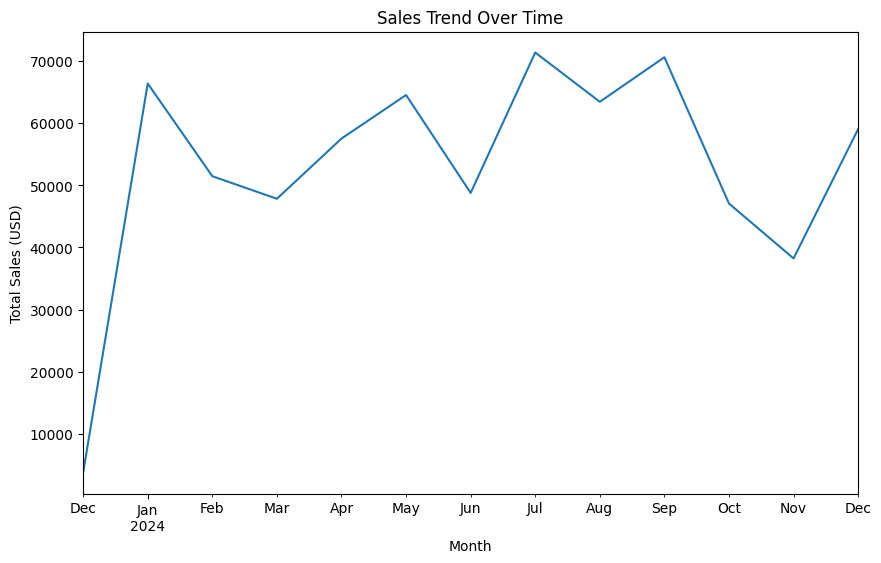

In [34]:
#visualize the sales vary over time
sales_trend.plot(kind='line', figsize=(10, 6), title="Sales Trend Over Time")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.show()

In [35]:
# Transactions by day of the week
combined['DayOfWeek'] = combined['TransactionDate'].dt.day_name()
day_sales = combined.groupby('DayOfWeek')['TotalValue'].sum()
print(day_sales)

DayOfWeek
Friday        87032.09
Monday       101984.33
Saturday      81399.74
Sunday        92605.93
Thursday      99202.71
Tuesday      108567.61
Wednesday    119203.15
Name: TotalValue, dtype: float64


In [36]:
# Average transaction value per customer
avg_spending = combined.groupby('CustomerName')['TotalValue'].mean().sort_values(ascending=False)
print(avg_spending)

CustomerName
Michael Harrell      1323.133333
Paul Carter          1278.110000
Catherine White      1266.426667
Karen Clements MD    1263.457500
Laura Watts          1245.720000
                        ...     
Amber Gonzalez        223.960000
Christina Stark       214.266667
Tina Ford             137.540000
Tyler Holt            132.640000
James Murphy           82.360000
Name: TotalValue, Length: 199, dtype: float64


In [37]:
# Frequency of transactions per customer
customer_frequency = combined['CustomerName'].value_counts()
print(customer_frequency.head(5))

CustomerName
Abigail Jones      11
William Adams      11
Paul Parsons       10
Matthew Johnson    10
Gerald Hines       10
Name: count, dtype: int64
